In [1]:
import os
import sys

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import IPython.display as ipd
from IPython.display import Audio, display, Markdown
import librosa
import librosa.display

C:\Users\andyl\AppData\Local\Temp\ipykernel_10572\3633292886.py:2: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(v1, max_points = 11025, x_axis= 's')


La muestra como un arreglo (serie de tiempo) y tiene  (98304,) numero de muestras


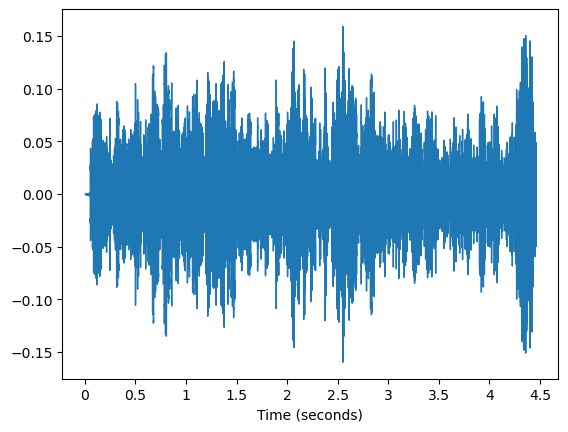

In [97]:
v1, sample_rate = librosa.load('AudioVoiceData/audDataStdrWav/Metod1Wav/Nula-01.wav', sr=32000)
librosa.display.waveshow(v1, max_points = 11025, x_axis= 's')
print("La muestra como un arreglo (serie de tiempo) y tiene ", v1.shape, "numero de muestras")


C:\Users\andyl\AppData\Local\Temp\ipykernel_10572\3493969972.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  v2, sample_rate = librosa.load('metod1_01/Vanessa-01_05.m4a', sr=32000)
C:\Users\andyl\anaconda3\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
C:\Users\andyl\AppData\Local\Temp\ipykernel_10572\3493969972.py:2: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(v2, max_points = 11025, x_axis= 's')


La muestra como un arreglo (serie de tiempo) y tiene  (48256,) numero de muestras


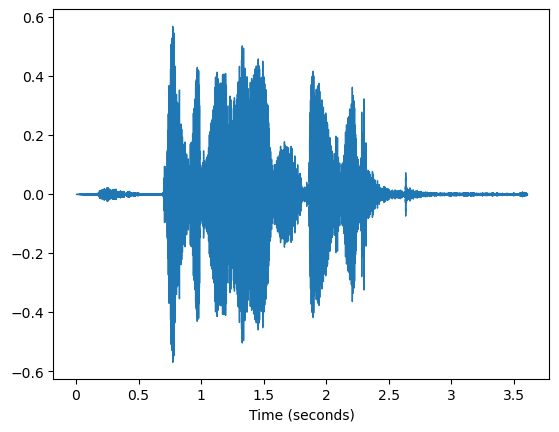

In [21]:
v2, sample_rate = librosa.load('metod1_01/Vanessa-01_05.m4a', sr=32000)
librosa.display.waveshow(v2, max_points = 11025, x_axis= 's')
print("La muestra como un arreglo (serie de tiempo) y tiene ", v1.shape, "numero de muestras")


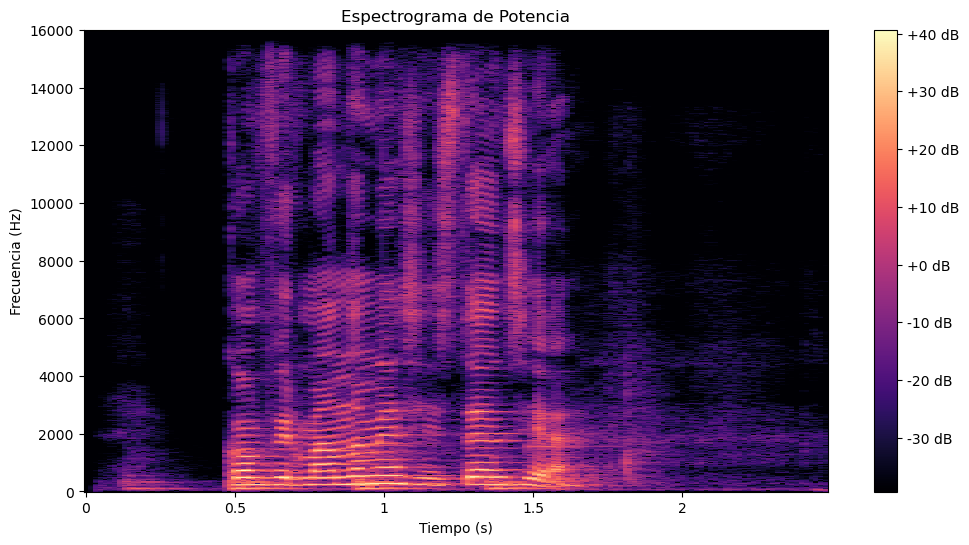

In [23]:
S = librosa.stft(v2)
S_db = librosa.amplitude_to_db(abs(S))  

plt.figure(figsize=(12, 6))
librosa.display.specshow(S_db, sr=sample_rate, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format="%+2.0f dB")
plt.title("Espectrograma de Potencia")
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.show()

In [25]:
audio_yos = librosa.effects.time_stretch(v2, rate=1)


Audio(data=audio_yos, rate=sample_rate)

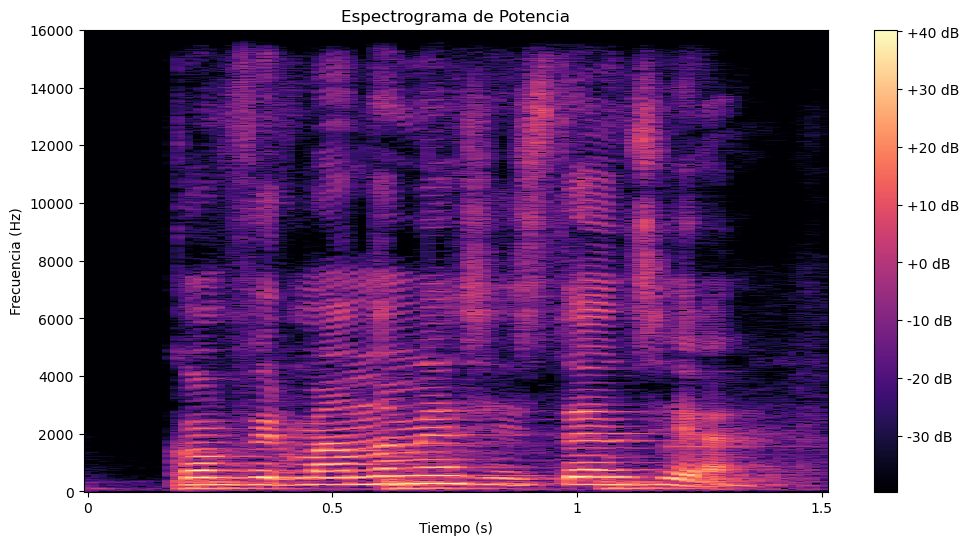

In [27]:
S = librosa.stft(v1)
S_db = librosa.amplitude_to_db(abs(S))  

plt.figure(figsize=(12, 6))
librosa.display.specshow(S_db, sr=sample_rate, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format="%+2.0f dB")
plt.title("Espectrograma de Potencia")
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.show()

In [29]:
audio_acelerado = librosa.effects.time_stretch(v1, rate=1)


Audio(data=audio_acelerado, rate=sample_rate)

In [46]:
n_coeff = 12

87
171


C:\Users\andyl\AppData\Local\Temp\ipykernel_10572\2836627430.py:9: UserWarning: PySoundFile failed. Trying audioread instead.
  X, sample_rate = librosa.load(path, duration=2.5, sr=22050*2, offset=0.5)


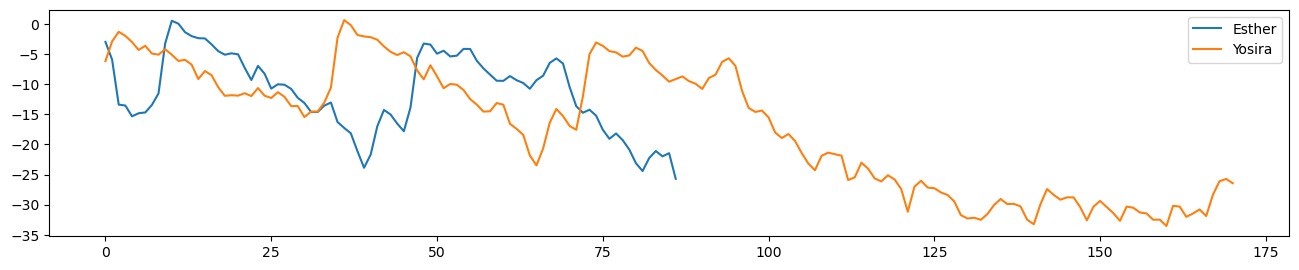

In [35]:
path = "AudioVoiceData/audDataStdrWav/Metod1Wav/Vanessa-01_05.wav"
X, sample_rate = librosa.load(path, duration=2.5, sr=22050*2, offset=0.5) 
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=n_coeff)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=n_coeff), axis=0)
print(len(female))


path = "metod1_01/Vanessa-01_05.m4a"
X, sample_rate = librosa.load(path, duration=2.5, sr=22050*2, offset=0.5)
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=n_coeff)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=n_coeff), axis=0)
print(len(male))

plt.figure(figsize=(16,10))
plt.subplot(3,1,1)
plt.plot(female, label='Esther')
plt.plot(male, label='Yosira')
plt.legend()

## Estadariazado de formato de Audio a WAV

In [5]:
from pydub import AudioSegment
import os

def convert_to_wav(input_folder, output_folder):
    # Crear la carpeta de salida si no existe
    os.makedirs(output_folder, exist_ok=True)
    
    for file_name in os.listdir(input_folder):
        # Ignorar archivos que no sean de audio
        if not file_name.endswith(('.ogg', '.m4a', '.mp3', '.wav', 'opus')):
            continue
        
        file_path = os.path.join(input_folder, file_name)
        audio = AudioSegment.from_file(file_path)
        
        # Crear el nuevo nombre del archivo en formato WAV
        output_file_name = os.path.splitext(file_name)[0] + '.wav'
        output_path = os.path.join(output_folder, output_file_name)
        
        # Exportar el audio en formato WAV
        audio.export(output_path, format='wav')
        print(f"Convertido: {file_name} -> {output_file_name}")

# Carpeta donde están tus audios originales
input_folder = "AudioVoiceData/audDataStdrWav"

# Carpeta donde se guardarán los audios convertidos
output_folder = "AudioVoiceData/audDataStdrWav"

convert_to_wav(input_folder, output_folder)


Convertido: Ruido-01.wav -> Ruido-01.wav
Convertido: Ruido-02.wav -> Ruido-02.wav
Convertido: Ruido-03.wav -> Ruido-03.wav
Convertido: Ruido-04.wav -> Ruido-04.wav
Convertido: Ruido-05.wav -> Ruido-05.wav
Convertido: Ruido-06.m4a -> Ruido-06.wav
Convertido: Ruido-07.m4a -> Ruido-07.wav
Convertido: Ruido-08.m4a -> Ruido-08.wav
Convertido: Ruido-11.wav -> Ruido-11.wav
Convertido: Ruido-12.wav -> Ruido-12.wav
Convertido: Ruido-13.wav -> Ruido-13.wav
Convertido: Ruido-14.wav -> Ruido-14.wav
Convertido: Ruido-15.wav -> Ruido-15.wav
Convertido: Ruido-16.wav -> Ruido-16.wav
Convertido: Ruido-17.wav -> Ruido-17.wav
Convertido: Ruido-18.wav -> Ruido-18.wav
Convertido: Ruido-19.wav -> Ruido-19.wav


## Eliminación de silencios en audio

In [ ]:
from pydub import AudioSegment
from pydub.silence import detect_nonsilent
import os

def trim_silence(audio, silence_threshold=-40.0, min_silence_len=500, margin=200):
    
    non_silent_ranges = detect_nonsilent(audio, min_silence_len=min_silence_len, silence_thresh=silence_threshold)
    
    if non_silent_ranges:
        start = max(0, non_silent_ranges[0][0] - margin)
        end = min(len(audio), non_silent_ranges[-1][1] + margin)
        return audio[start:end]
    
    return audio 

def process_audio_files(input_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    
    for file_name in os.listdir(input_folder):
        if not file_name.endswith(('.ogg', '.m4a', '.mp3', '.wav')):
            continue
        
        file_path = os.path.join(input_folder, file_name)
        audio = AudioSegment.from_file(file_path)

     
        file_base_name = os.path.splitext(file_name)[0]
        output_path = os.path.join(output_folder, file_base_name + '.wav')

        
        trimmed_audio = trim_silence(audio)

        
        trimmed_audio.export(output_path, format='wav')
        print(f"Procesado: {file_name} -> {file_base_name}.wav")


input_folder = "AudioVoiceData/audDataStdrWav/Metod3Wav"
output_folder = input_folder  

process_audio_files(input_folder, output_folder)


## Extracción de caracteristicas
obtenemos MFCC, Chroma y espectral contrast mean

In [47]:
import librosa
import numpy as np
import pandas as pd
import os

def extract_features(file_path, method, sr=22050, n_mfcc=13):
    """
    Extrae características de un audio y añade el nombre del sujeto y el método.
    """
    y, sr = librosa.load(file_path, sr=sr)

    # Extraer características
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    rms = librosa.feature.rms(y=y)

    # Guardar en diccionario
    features = {
        "file": os.path.basename(file_path),
        "speaker": os.path.basename(file_path).split("-")[0],  
        "method": method,  
        "mfcc_mean": np.mean(mfccs, axis=1).tolist(),  
        "chroma_mean": np.mean(chroma, axis=1).tolist(),
        "spectral_contrast_mean": np.mean(spectral_contrast, axis=1).tolist(),
        "zero_crossing_rate_mean": np.mean(zero_crossing_rate),
        "rms_mean": np.mean(rms)
    }

    return features

def process_audio_folder(method_folder):
    feature_list = []

    
    if not os.path.exists(method_folder):
        print(f"Error: La carpeta {method_folder} no existe.")
        return None

    
    for file_name in os.listdir(method_folder):
        if file_name.endswith('.wav'):
            file_path = os.path.join(method_folder, file_name)
            features = extract_features(file_path, os.path.basename(method_folder))
            feature_list.append(features)

   
    if not feature_list:
        print(f"No se encontraron archivos .wav en {method_folder}")
        return None

    #DataFrame
    df = pd.DataFrame(feature_list)

    
    mfcc_df = pd.DataFrame(df['mfcc_mean'].tolist(), columns=[f"mfcc_{i+1}" for i in range(13)])
    chroma_df = pd.DataFrame(df['chroma_mean'].tolist(), columns=[f"chroma_{i+1}" for i in range(12)])
    spectral_df = pd.DataFrame(df['spectral_contrast_mean'].tolist(), columns=[f"spectral_contrast_{i+1}" for i in range(7)])

    # Concatenar DataFrames finales
    df_final = pd.concat([df.drop(columns=["mfcc_mean", "chroma_mean", "spectral_contrast_mean"]),
                          mfcc_df, chroma_df, spectral_df], axis=1)

    return df_final


method_folder = "AudioVoiceData/audDataStdrWav/Metod3Wav"


df_features = process_audio_folder(method_folder)
if df_features is not None:
    csv_name = f"features_{os.path.basename(method_folder)}.csv"
    df_features.to_csv(csv_name, index=False)
    print(f"CSV creado: {csv_name}")


CSV creado: features_Metod3Wav.csv


## Análisis de caracteristicas

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "features_Metod1Wav.csv"  
df = pd.read_csv(file_path)

print(df.head())
print(df.isnull().sum())
print(df.describe())

                      file        speaker     method  zero_crossing_rate_mean  \
0  AndresCalzada-01_01.wav  AndresCalzada  Metod1Wav                 0.090435   
1  AndresCalzada-01_02.wav  AndresCalzada  Metod1Wav                 0.089401   
2  AndresCalzada-01_03.wav  AndresCalzada  Metod1Wav                 0.082700   
3  AndresCalzada-01_04.wav  AndresCalzada  Metod1Wav                 0.095836   
4  AndresCalzada-01_05.wav  AndresCalzada  Metod1Wav                 0.073025   

   rms_mean      mfcc_1      mfcc_2    mfcc_3     mfcc_4     mfcc_5  ...  \
0  0.141137 -247.286240  121.550438  4.521112  44.359432  -9.850592  ...   
1  0.130708 -257.186005  139.888657  0.704149  46.338470  -9.394456  ...   
2  0.190353 -223.174835  147.451050  2.747607  53.496418 -15.341558  ...   
3  0.146500 -258.367218  137.109848  0.818385  48.921741 -13.490925  ...   
4  0.138736 -262.130157  137.394516  4.554736  47.059715 -10.929000  ...   

   chroma_10  chroma_11  chroma_12  spectral_contrast_1 

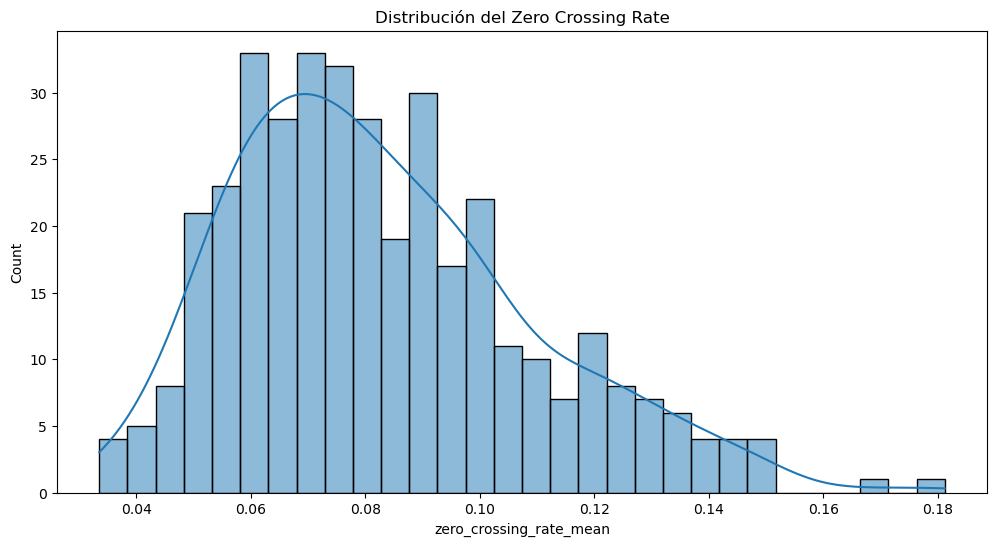

In [51]:
plt.figure(figsize=(12, 6))
sns.histplot(df['zero_crossing_rate_mean'], bins=30, kde=True)
plt.title('Distribución del Zero Crossing Rate')
plt.show()




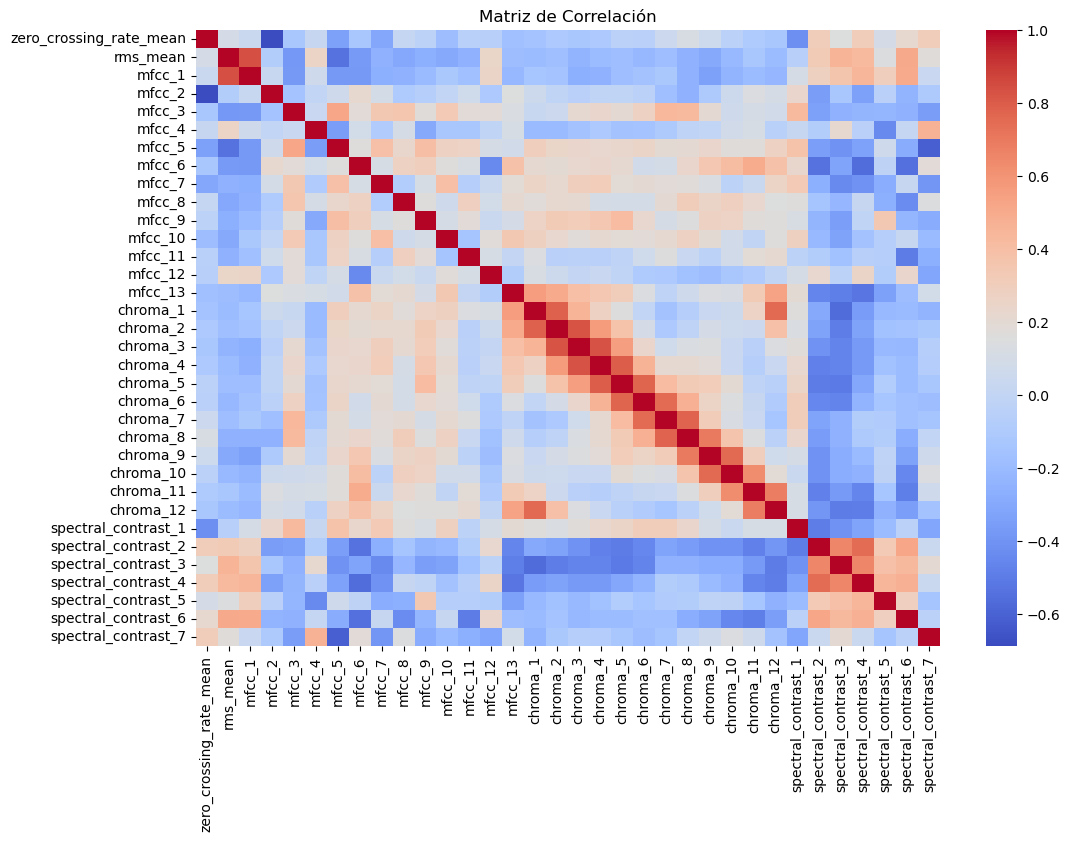

In [53]:
df_numeric = df.select_dtypes(include=[np.number])

# Generar la matriz de correlación sin errores
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=False)
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
from pydub import AudioSegment
import os
import random
import re

def get_next_filename(original_name, existing_files):
    """
    Genera un nuevo nombre de archivo incrementando el último número en el nombre original.
    """
    match = re.search(r'(\d+)(?=\.\w+$)', original_name)  # Busca el último número antes de la extensión
    if match:
        base_name = original_name[:match.start()]  # Nombre sin el número final
        number = int(match.group())  # Último número encontrado
        for i in range(1, 6):  # Generar hasta 5 nuevas versiones por archivo
            new_name = f"{base_name}{number + i}.wav"
            if new_name not in existing_files:  # Asegurar que no se repita
                return new_name
    return None

def mix_audio_with_background(audio_folder, background_folder, output_folder, bg_volume=-20):
    """
    Mezcla audios de voz con audios ambientales, generando más audios por cada original.
    
    - Mantiene el formato del nombre, cambiando solo el último dígito.
    - Cada audio de voz se mezcla con distintos audios ambientales aleatorios.
    - Ajusta la duración del audio ambiental para que coincida con el de voz.
    """
    os.makedirs(output_folder, exist_ok=True)

    # Obtener listas de archivos
    voice_files = [f for f in os.listdir(audio_folder) if f.endswith('.wav')]
    background_files = [f for f in os.listdir(background_folder) if f.endswith('.wav')]
    existing_files = set(os.listdir(output_folder))

    if not background_files:
        raise ValueError("No hay audios ambientales en la carpeta proporcionada.")

    for voice_file in voice_files:
        voice_path = os.path.join(audio_folder, voice_file)
        voice_audio = AudioSegment.from_wav(voice_path)

        for _ in range(5):  # Generar 5 versiones mezcladas por cada audio original
            background_file = random.choice(background_files)
            background_path = os.path.join(background_folder, background_file)
            background_audio = AudioSegment.from_wav(background_path)

            # Ajustar duración del audio ambiental al del audio de voz
            if len(background_audio) > len(voice_audio):
                background_audio = background_audio[:len(voice_audio)]
            else:
                while len(background_audio) < len(voice_audio):
                    background_audio += background_audio
                background_audio = background_audio[:len(voice_audio)]

            # Reducir volumen del fondo para no opacar la voz
            background_audio = background_audio - abs(bg_volume)

            # Mezclar ambos audios
            mixed_audio = voice_audio.overlay(background_audio)

            # Generar nuevo nombre de archivo siguiendo la numeración original
            new_filename = get_next_filename(voice_file, existing_files)
            if new_filename:
                output_path = os.path.join(output_folder, new_filename)
                mixed_audio.export(output_path, format="wav")
                existing_files.add(new_filename)
                print(f"Archivo guardado: {output_path}")

# Directorios de los audios
voice_folder = "AudioVoiceData/audDataStdrWav/Metod3Wav"  # Carpeta con los audios de voz
background_folder = "AudioVoiceData"  # Carpeta con los audios de fondo
output_folder = "AudioVoiceData/audDataStdrWav/Metod3Wav"  # Carpeta de salida

# Ejecutar la función
mix_audio_with_background(voice_folder, background_folder, output_folder, bg_volume=-20)
